##      **Rick and Morty Character Image Detection**

# Downloading the Dataset
First, we need to install the Kaggle API and authenticate it to download the "Rick and Morty" dataset.

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d mriffaud/rick-and-morty
!unzip rick-and-morty.zip -d rick_and_morty_dataset

Streaming output truncated to the last 5000 lines.
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_173632.jpg  
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_173840.jpg  
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_174049.jpg  
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_174257.jpg  
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_174466.jpg  
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_174675.jpg  
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_174883.jpg  
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_175092.jpg  
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_175300.jpg  
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_175509.jpg  
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_208041.jpg  
  inflating: rick_and_morty_dataset/rick_and_morty/Morty/2_E6_208250.jpg  
  inflating: rick_and_morty_dataset/rick_and_mort

# Moving the folders to train directory

This code organizes training datasets by moving each folder containing training data to a new directory named 'train'.

In [3]:
import os

base_dir = '/content/rick_and_morty_dataset/rick_and_morty'
train_dir = os.path.join(base_dir, 'train')

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

folders_to_move = ['Beth', 'Jerry', 'Morty', 'Rick', 'Summer']
for folder in folders_to_move:
    src = os.path.join(base_dir, folder)
    dst = os.path.join(train_dir, folder)
    os.rename(src, dst)

# Creating CSV files for train and test dataset :-

we are pre-processing the data and creating train_data.csv and test_data.csv file with columns image_path and label for further processing:-


In [4]:
import os
import pandas as pd

train_dir = '/content/rick_and_morty_dataset/rick_and_morty/train'

image_paths = []
labels = []

for label in os.listdir(train_dir):
    label_dir = os.path.join(train_dir, label)
    if os.path.isdir(label_dir):
        for image_name in os.listdir(label_dir):
            if image_name.endswith('.jpg') or image_name.endswith('.png'):
                image_path = os.path.join(label_dir, image_name)
                image_paths.append(image_path)
                labels.append(label)

data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)

csv_file_path = '/content/rick_and_morty_dataset/rick_and_morty/train_data.csv'
df.to_csv(csv_file_path, index=False)

print("CSV train file saved successfully!")

CSV train file saved successfully!


In [5]:
import os
import pandas as pd

test_folder = '/content/rick_and_morty_dataset/rick_and_morty/test'

image_paths = []
labels = []

# Iterate through each image file in the test folder
for image_name in os.listdir(test_folder):
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        image_path = os.path.join(test_folder, image_name)
        image_paths.append(image_path)
        labels.append('Unknown')

df = pd.DataFrame({'Image_Path': image_paths, 'Label': labels})

csv_file_path = '/content/rick_and_morty_dataset/rick_and_morty/test_data.csv'
df.to_csv(csv_file_path, index=False)

print("CSV test file saved successfully!")

CSV test file saved successfully!


# Importing Libraries :-

we need to import machine learning related API's for image processing , manipulating layers and model MobileNetV2 with pre-trained weights , pandas for reading csv files into dataframes and Matplotlib for creating visualizations, such as line plots, bar charts :-

In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2  , InceptionV3 , VGG16
from keras import layers, models, optimizers


# Creating Data Generators for Image Classification
This code snippet summarizes the process of creating data generators for training and validation sets . It includes setting up image data augmentation for the training set (train_datagen) and scaling for the testing set (test_datagen), defining the batch size and target image size, and loading the dataset using the flow_from_directory method with categorical class mode for image classification tasks.

In [7]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/rick_and_morty_dataset/rick_and_morty/train_data.csv')

train_df, val_df = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)
num_classes = len(df['Label'].unique())
print(num_classes)

5


In [8]:
# Define data generators for train and validation sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
target_size = (224, 224)

In [9]:

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='Image_Path',
                                                    y_col='Label',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                        x_col='Image_Path',
                                                        y_col='Label',
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 7530 validated image filenames belonging to 5 classes.
Found 1883 validated image filenames belonging to 5 classes.


# Exploratory Data Analysis

In [10]:
# Understand the dataset
print(train_df.head())
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

                                             Image_Path   Label
4335  /content/rick_and_morty_dataset/rick_and_morty...   Morty
2455  /content/rick_and_morty_dataset/rick_and_morty...    Rick
8978  /content/rick_and_morty_dataset/rick_and_morty...   Jerry
8847  /content/rick_and_morty_dataset/rick_and_morty...   Jerry
6718  /content/rick_and_morty_dataset/rick_and_morty...  Summer
(7530, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 7530 entries, 4335 to 7270
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  7530 non-null   object
 1   Label       7530 non-null   object
dtypes: object(2)
memory usage: 176.5+ KB
None
                                               Image_Path Label
count                                                7530  7530
unique                                               7530     5
top     /content/rick_and_morty_dataset/rick_and_morty...  Rick
freq                                   

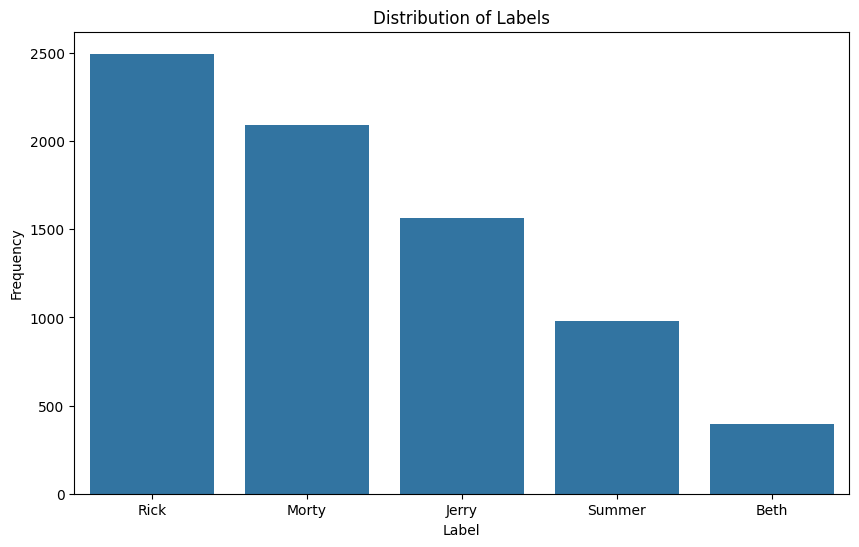

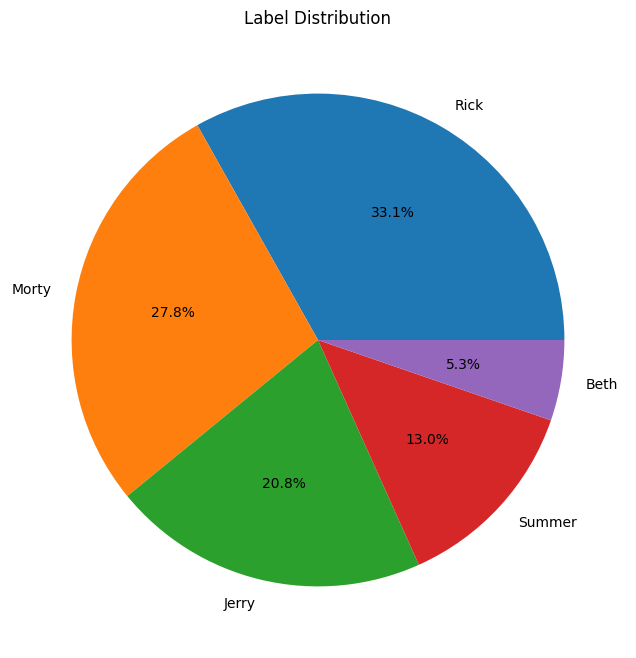

In [11]:
# Data Visualization
# Bar chart for label distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Label', order=train_df['Label'].value_counts().index)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

# Pie chart for label distribution
plt.figure(figsize=(8, 8))
train_df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Label Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

Number of unique image paths: 7530


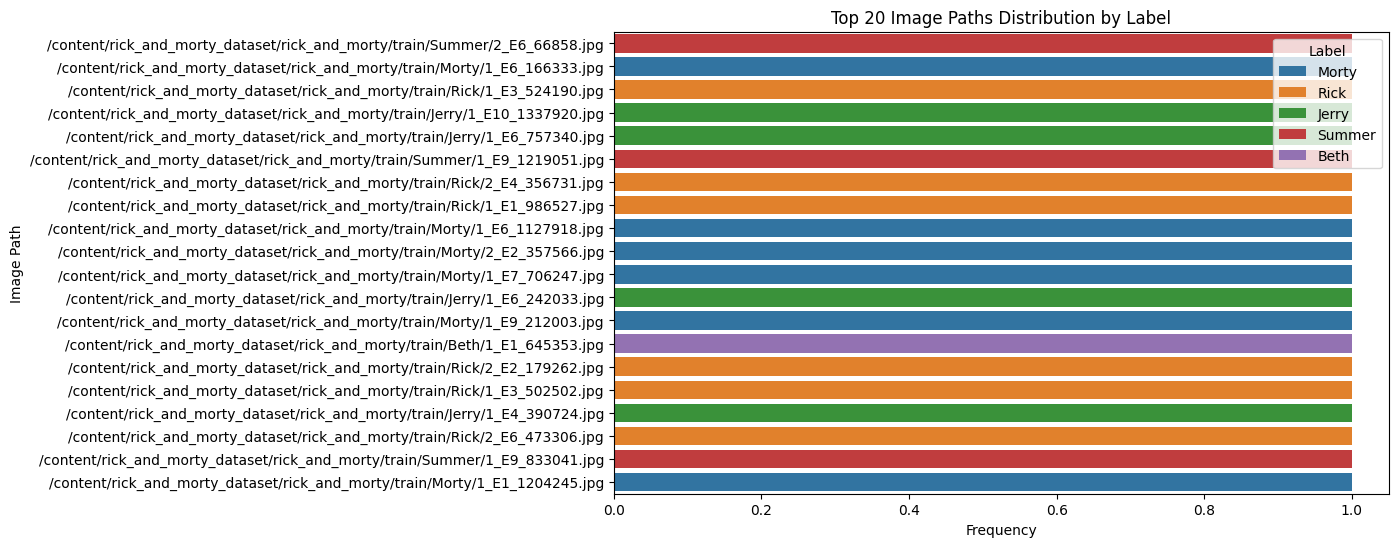

Column Image_Path has 7530 unique values.
Column Label has 5 unique values.


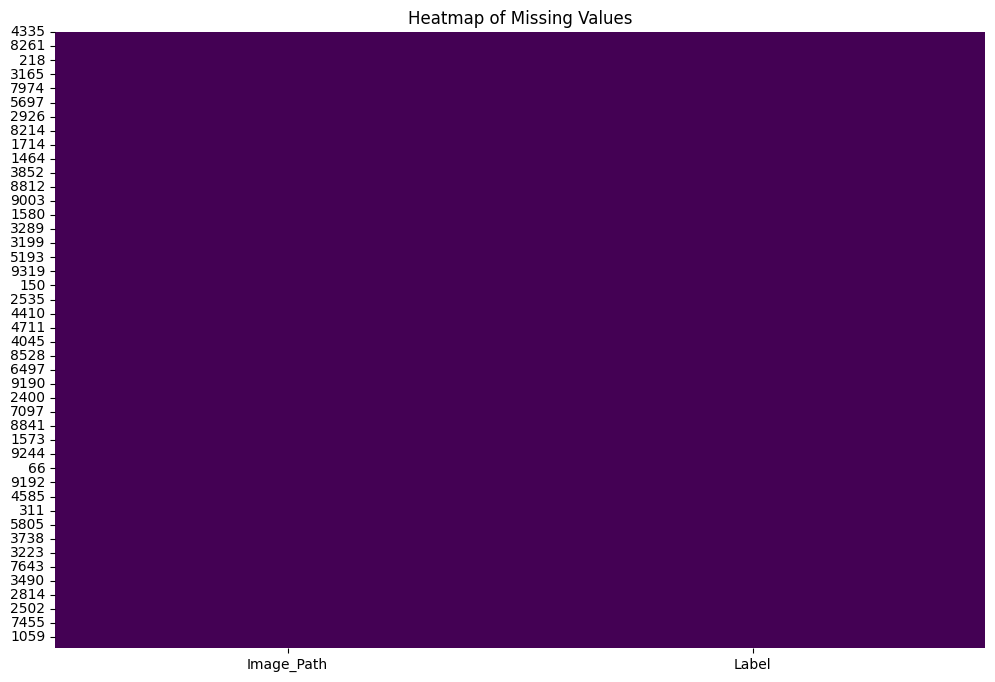

Label
Rick      2496
Morty     2091
Jerry     1566
Summer     979
Beth       398
Name: count, dtype: int64


In [14]:
# Count unique image paths
unique_paths = train_df['Image_Path'].nunique()
print(f"Number of unique image paths: {unique_paths}")

# Image paths distribution by label (top 20 paths for readability)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='Image_Path', hue='Label', order=train_df['Image_Path'].value_counts().index[:20])
plt.title('Top 20 Image Paths Distribution by Label')
plt.xlabel('Frequency')
plt.ylabel('Image Path')
plt.show()

# Unique values for each categorical column
for column in train_df.select_dtypes(include=['object']).columns:
    unique_values = train_df[column].nunique()
    print(f"Column {column} has {unique_values} unique values.")

# Missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Label counts summary
label_counts = train_df['Label'].value_counts()
print(label_counts)

In [15]:
# Data Cleaning
print(train_df.isnull().sum())
train_df.fillna(method='ffill', inplace=True)
print(train_df.duplicated().sum())
train_df.drop_duplicates(inplace=True)

Image_Path    0
Label         0
dtype: int64
0


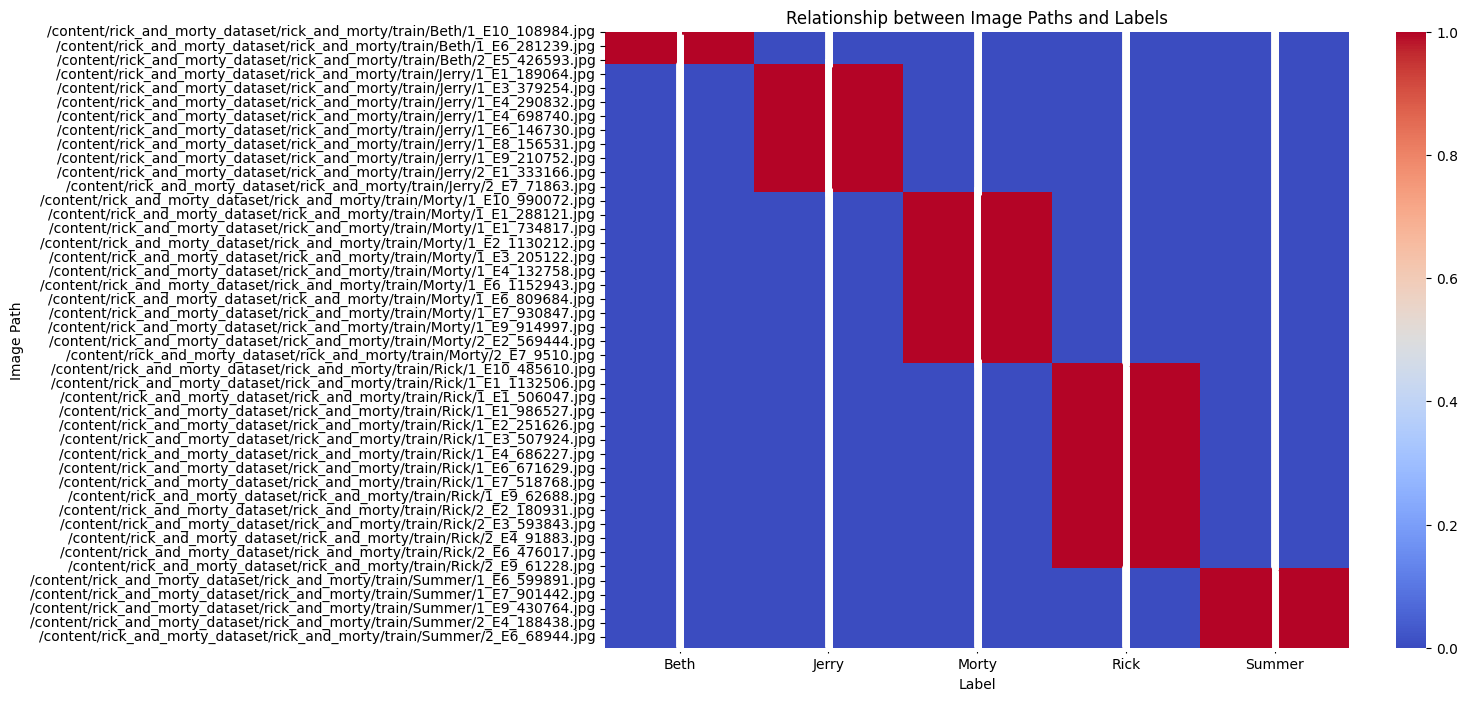

In [16]:
# Create a cross-tabulation or contingency table
cross_tab = pd.crosstab(train_df['Image_Path'], train_df['Label'])

# Plotting the heatmap for the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship between Image Paths and Labels')
plt.xlabel('Label')
plt.ylabel('Image Path')
plt.show()

# Loading the Base-Model
This code snippet defines a MobileNetV2 base model in Keras. The model is configured with an input shape of (224, 224, 3) to match the size and channels of the images in your dataset. It includes all layers of the MobileNetV2 model up to the final fully connected layers but excludes the last fully connected layer, which is often customized for specific tasks.

In [25]:
# List of base models with their respective input shapes
base_models = [
    (InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (299, 299, 3), 'InceptionV3'),
    (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'MobileNetV2'),
    (VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'VGG16')
]

# Customizing it according to our usecase
This code snippet summarizes the process of creating a custom MobileNetV2-based categorical classification model in Keras. It involves loading the pre-trained MobileNetV2 model, freezing its layers, adding custom layers for classification, compiling the model, shuffling the training data, and training the model. Finally, the trained model is saved as an HDF5 file (MobileNetV2_model_categorical.h5).

In [18]:
from keras import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D

def create_model(base_model, input_shape, num_classes):
    base_model.trainable = False  # Freeze the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model


In [19]:
def train_and_evaluate(model, train_data, val_data, model_name):
    # Compile the model
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10)

    # Evaluate the model
    val_accuracy = history.history['val_accuracy'][-1]
    print(f'{model_name} Validation Accuracy: {val_accuracy:.4f}')

    # Plot training history
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Accuracy')
    plt.show()

    return history

Training InceptionV3...
Epoch 1/10
236/236 [==============================] - 208s 838ms/step - loss: 0.7144 - accuracy: 0.7430 - val_loss: 0.5764 - val_accuracy: 0.7754
Epoch 2/10
236/236 [==============================] - 179s 759ms/step - loss: 0.3478 - accuracy: 0.8756 - val_loss: 0.2588 - val_accuracy: 0.9145
Epoch 3/10
236/236 [==============================] - 175s 741ms/step - loss: 0.2952 - accuracy: 0.8910 - val_loss: 0.2514 - val_accuracy: 0.9166
Epoch 4/10
236/236 [==============================] - 164s 697ms/step - loss: 0.2312 - accuracy: 0.9193 - val_loss: 0.2379 - val_accuracy: 0.9156
Epoch 5/10
236/236 [==============================] - 170s 721ms/step - loss: 0.1883 - accuracy: 0.9371 - val_loss: 0.2352 - val_accuracy: 0.9172
Epoch 6/10
236/236 [==============================] - 167s 709ms/step - loss: 0.1611 - accuracy: 0.9426 - val_loss: 0.1710 - val_accuracy: 0.9469
Epoch 7/10
236/236 [==============================] - 165s 699ms/step - loss: 0.1712 - accuracy: 0.9

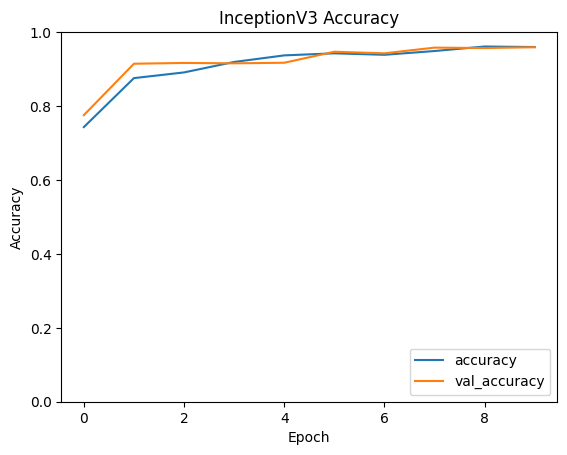

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved InceptionV3 model to saved_models/InceptionV3_saved.h5
Training MobileNetV2...
Epoch 1/10
236/236 [==============================] - 173s 715ms/step - loss: 0.4377 - accuracy: 0.8498 - val_loss: 0.2379 - val_accuracy: 0.9129
Epoch 2/10
236/236 [==============================] - 167s 709ms/step - loss: 0.1778 - accuracy: 0.9382 - val_loss: 0.1516 - val_accuracy: 0.9501
Epoch 3/10
236/236 [==============================] - 168s 710ms/step - loss: 0.1222 - accuracy: 0.9602 - val_loss: 0.1346 - val_accuracy: 0.9565
Epoch 4/10
236/236 [==============================] - 166s 702ms/step - loss: 0.0800 - accuracy: 0.9713 - val_loss: 0.2109 - val_accuracy: 0.9310
Epoch 5/10
236/236 [==============================] - 164s 694ms/step - loss: 0.0676 - accuracy: 0.9772 - val_loss: 0.1096 - val_accuracy: 0.9618
Epoch 6/10
236/236 [==============================] - 165s 701ms/step - loss: 0.0601 - accuracy: 0.9782 - val_loss: 0.1643 - val_accuracy: 0.9485
Epoch 7/10
236/236 [===================

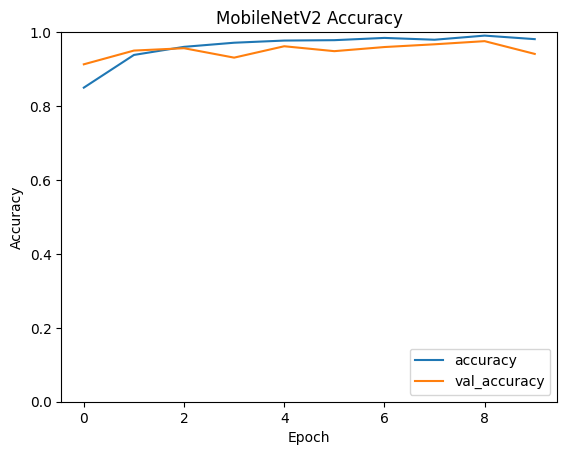

Saved MobileNetV2 model to saved_models/MobileNetV2_saved.h5
Training VGG16...
Epoch 1/10
236/236 [==============================] - 185s 752ms/step - loss: 0.7352 - accuracy: 0.7335 - val_loss: 0.4236 - val_accuracy: 0.8534
Epoch 2/10
236/236 [==============================] - 172s 729ms/step - loss: 0.3334 - accuracy: 0.8891 - val_loss: 0.2278 - val_accuracy: 0.9198
Epoch 3/10
236/236 [==============================] - 176s 746ms/step - loss: 0.2189 - accuracy: 0.9195 - val_loss: 0.1487 - val_accuracy: 0.9453
Epoch 4/10
236/236 [==============================] - 168s 711ms/step - loss: 0.1583 - accuracy: 0.9458 - val_loss: 0.1537 - val_accuracy: 0.9453
Epoch 5/10
236/236 [==============================] - 173s 732ms/step - loss: 0.1421 - accuracy: 0.9485 - val_loss: 0.1552 - val_accuracy: 0.9501
Epoch 6/10
236/236 [==============================] - 171s 726ms/step - loss: 0.1241 - accuracy: 0.9567 - val_loss: 0.3468 - val_accuracy: 0.8901
Epoch 7/10
236/236 [=========================

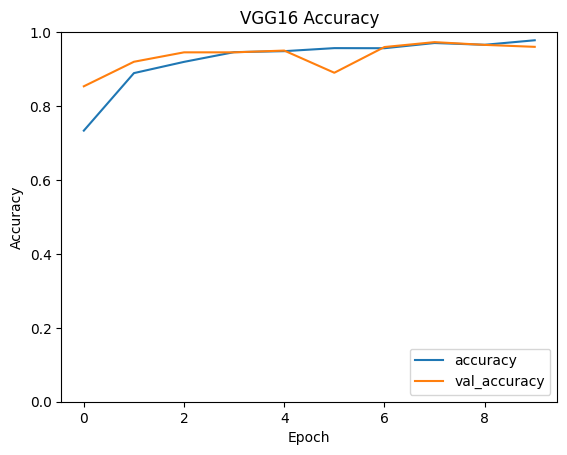

Saved VGG16 model to saved_models/VGG16_saved.h5


In [20]:
# Directory to save the models
save_dir = 'saved_models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Train and evaluate each model
histories = {}
for base_model, input_shape, model_name in base_models:
    # Resize data if necessary (dummy data, so not applicable here)
    if input_shape != (224, 224, 3):
        # Resize X_train and X_val to the required input_shape
        # This is just a placeholder, implement actual resizing if needed
        pass

    # Create the model
    model = create_model(base_model, input_shape, num_classes)

    # Train and evaluate the model
    print(f'Training {model_name}...')
    history = train_and_evaluate(model, train_generator, validation_generator, model_name)
    histories[model_name] = history

    # Save the model after training
    model.save(os.path.join(save_dir, f'{model_name}_saved.h5'))
    print(f'Saved {model_name} model to {save_dir}/{model_name}_saved.h5')

# Testing and labeling unseen data

In [42]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

# Load test dataset
test = pd.read_csv('/content/rick_and_morty_dataset/rick_and_morty/test_data.csv')
test_df = test.copy()

# Load class indices (assuming you have train_generator with class indices saved)
class_indices_inverse = {v: k for k, v in train_generator.class_indices.items()}

# Directory containing the saved models
model_dir = '/content/saved_models'

# Iterate over each model file in the directory
for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        # Load the model
        model_path = os.path.join(model_dir, model_file)
        model = load_model(model_path)

        # Determine target size based on model
        if "InceptionV3_saved" in model_file:
            target_size = (299, 299)
        else:
            target_size = (224, 224)

        # Load and preprocess test images
        test_image = []
        for img_path in tqdm(test_df['Image_Path']):
            img = image.load_img(img_path, target_size=target_size, grayscale=False)
            img = image.img_to_array(img)
            img = img / 255.0
            test_image.append(img)

        test = np.array(test_image)

        # Make predictions
        prediction_probs = model.predict(test)
        prediction = np.argmax(prediction_probs, axis=1)

        # Map predictions to class labels
        prediction_labels = [class_indices_inverse[label] for label in prediction]

        # Create a DataFrame with predictions
        predicted_df = pd.DataFrame({
            'Image_Path': test_df['Image_Path'],
            'Label': prediction_labels,
        })

        # Save predictions to CSV
        csv_path = f'/content/rick_and_morty_dataset/rick_and_morty/predicted_{model_file.split(".")[0]}.csv'
        predicted_df.to_csv(csv_path, header=True, index=False)

        print(f"Predictions saved to {csv_path}")

100%|██████████| 375/375 [00:03<00:00, 118.41it/s]


12/12 [==============================] - 2s 124ms/step
Predictions saved to /content/rick_and_morty_dataset/rick_and_morty/predicted_VGG16_saved.csv


100%|██████████| 375/375 [00:03<00:00, 122.74it/s]


12/12 [==============================] - 1s 42ms/step
Predictions saved to /content/rick_and_morty_dataset/rick_and_morty/predicted_MobileNetV2_saved.csv


100%|██████████| 375/375 [00:03<00:00, 94.20it/s]


12/12 [==============================] - 3s 121ms/step
Predictions saved to /content/rick_and_morty_dataset/rick_and_morty/predicted_InceptionV3_saved.csv


# image label and prediction and visualization

Predictions using model: VGG16_saved
1/1 [==============================] - 0s 19ms/step


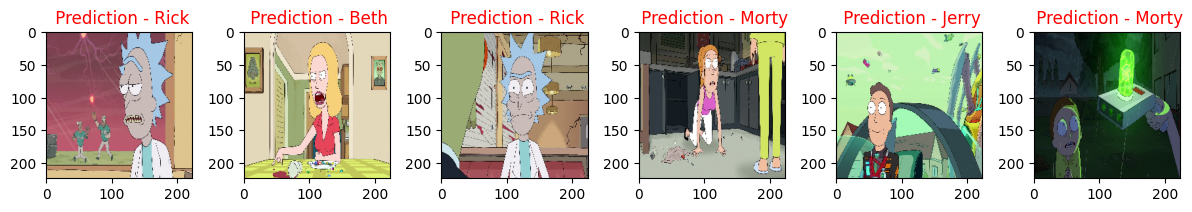

Predictions using model: MobileNetV2_saved
1/1 [==============================] - 0s 23ms/step


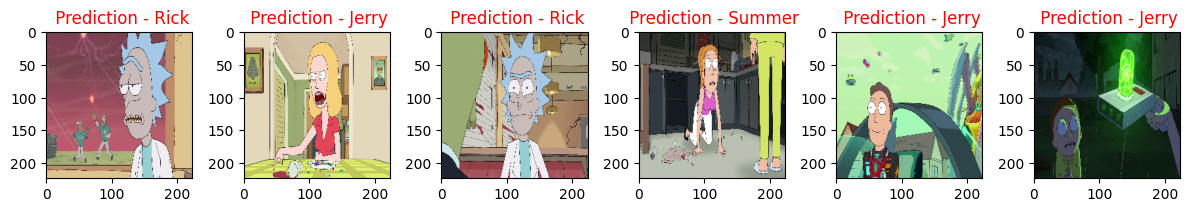

Predictions using model: InceptionV3_saved
1/1 [==============================] - 0s 41ms/step


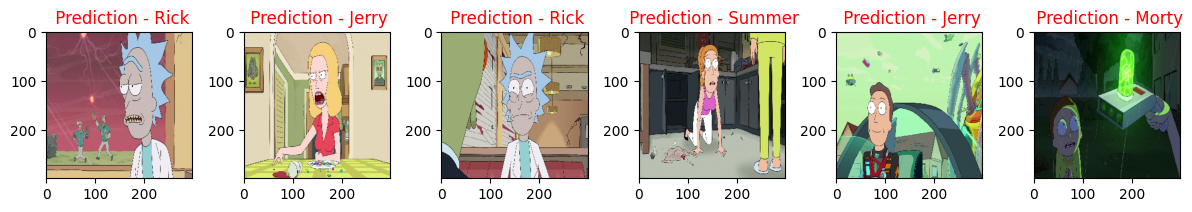

In [56]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Example usage
filenames = [
    '/content/rick_and_morty_dataset/rick_and_morty/test/3_E1_237237.jpg',
    '/content/rick_and_morty_dataset/rick_and_morty/test/3_E1_155906.jpg',
    '/content/rick_and_morty_dataset/rick_and_morty/test/3_E1_212838.jpg',
    '/content/rick_and_morty_dataset/rick_and_morty/test/3_E1_253086.jpg',
    '/content/rick_and_morty_dataset/rick_and_morty/test/3_E1_119619.jpg',
    '/content/rick_and_morty_dataset/rick_and_morty/test/3_E1_392183.jpg'
]

def predict_image(filenames, model , model_name):
    classes = ["Beth", "Jerry", "Morty", "Rick" , "Summer"]  # Define your class names
    num_images = len(filenames)

    fig, axes = plt.subplots(1, num_images, figsize=(12, 4))

    for i, filename in enumerate(filenames):
        if model_name == 'InceptionV3_saved':
            img_ = image.load_img(filename, target_size=(299, 299))  # Use target size 299x299 for InceptionV3
        else:
            img_ = image.load_img(filename, target_size=(224, 224))  # Default target size for other models
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0)
        img_processed /= 255.

        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        ax = axes[i] if num_images > 1 else axes
        ax.imshow(img_array)
        ax.set_title(f" Prediction - {classes[index].title()}", size=12, color='red')


    plt.tight_layout()
    plt.show()


# Directory containing the saved models
model_dir = '/content/saved_models'

# Iterate over each model file in the directory
for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        # Load the model
        model_path = os.path.join(model_dir, model_file)
        model = load_model(model_path)

        # Determine the model name
        model_name = model_file.split('.')[0]

        # Predict and plot images for each model
        print(f"Predictions using model: {model_name}")
        predict_image(filenames, model, model_name)